--------------
Pnevmoniya
----------------
O'pka tomografiyasida zararlangan va zararlanmagan o'pkalarni topishga harakat qilamiz.

Bizga kerakli kutubxonani versiyasi bilan ko'rib chaqirib olamiz

In [1]:
import fastai
import torch

print(fastai.__version__)
print(torch.__version__)

2.7.14
2.2.1+cu121


In [2]:
import pandas as pd
import numpy as np

`Kaggle` ga ulab olamiz

In [3]:
!pip install kaggle

Qaysi fayl bilan ishlayotganimizni fayl bilan manzilini berib ketamiz

In [ ]:
from google.colab import files

files.upload()

Endi, 1-o'rinda `kaggle` ga ulanib olamiz

2-o'rinda biz frofilimizdan yangi kalit qiymatni yuklab olamiz.

3-o'rinda shu kalit bilan kaggleni ulab qo'yamiz

4-o'rinda `kaggle` saytidan kerakli dataset nomini berib `google colab`ga yuklab olamiz

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c pnevmoniya

100% 1.14G/1.14G [00:17<00:00, 134MB/s]
100% 1.14G/1.14G [00:17<00:00, 71.7MB/s]


shu yuklab olgan faylimizni .zipdan chiqarib olamiz

In [ ]:
! unzip pnevmoniya.zip

In [7]:
df1 = pd.read_csv("/content/sample_solution.csv")
df1

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,0
620,test_img_10621.jpeg,0
621,test_img_10622.jpeg,0
622,test_img_10623.jpeg,0


kutubxonalarni chaqirib olib, pathda kerakli `train` datasetini uzatamiz

In [8]:
from fastai.vision.all import *
from ipywidgets import widgets

# path - biz ishlatmoqchi bo'lgan papka haqida malumotni saqlaymiz va ishlatamiz
path = Path('/content/train')

yangi o'zgaruvchiga `test` datasetini ham saqlab qo'yamiz

In [9]:
path1 = Path("/content/test")
# files - path ni ichida nechta fayl yani rasmlarni yuklab olganligimiz haqida malumot
files1 = get_image_files(path1)
files1

(#624) [Path('/content/test/test_img_10356.jpeg'),Path('/content/test/test_img_10074.jpeg'),Path('/content/test/test_img_10070.jpeg'),Path('/content/test/test_img_10384.jpeg'),Path('/content/test/test_img_10444.jpeg'),Path('/content/test/test_img_10462.jpeg'),Path('/content/test/test_img_10028.jpeg'),Path('/content/test/test_img_10607.jpeg'),Path('/content/test/test_img_10458.jpeg'),Path('/content/test/test_img_10388.jpeg')...]

In [10]:
# files - path ni ichida nechta fayl yani rasmlarni yuklab olganligimiz haqida malumot
files = get_image_files(path)
files

(#5216) [Path('/content/train/PNEUMONIA/person1451_virus_2479.jpeg'),Path('/content/train/PNEUMONIA/person451_bacteria_1942.jpeg'),Path('/content/train/PNEUMONIA/person1180_virus_2011.jpeg'),Path('/content/train/PNEUMONIA/person13_bacteria_49.jpeg'),Path('/content/train/PNEUMONIA/person1274_bacteria_3236.jpeg'),Path('/content/train/PNEUMONIA/person294_bacteria_1386.jpeg'),Path('/content/train/PNEUMONIA/person392_bacteria_1784.jpeg'),Path('/content/train/PNEUMONIA/person927_virus_1584.jpeg'),Path('/content/train/PNEUMONIA/person545_bacteria_2288.jpeg'),Path('/content/train/PNEUMONIA/person520_bacteria_2204.jpeg')...]

In [11]:
# failed - bu fayni yani biror bir rasmni yuklashda muammo bo'lganda xabar beradi
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

modelimizni yaratishni boshlaymiz:


In [12]:
# datablock yaratib olamiz
aralash = DataBlock(
    # CategoryBlock - bu rasmlarimiz kategoriyalarga ajraltish
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    #splitter - bu datamizni train va test setlarga ajratib beradi
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    # parent_label - bu barcha rasmlarimiz uchun tepasiga class nomini yozib ishlatadi
    get_y = parent_label,
    # Resize - bu rasmlarimizni 224x224 o'lchamda to'g'rilab oladi, chunki ko'p modellar shu o'lchamda moslashgan
    item_tfms=Resize(224)
)

In [13]:
# downloaders yaratamiz
dls = aralash.dataloaders(path)

bu yerda `file_tune` sonlari qancha katta bo'lsa aniqligi ham shunchalik yaxshi bo'ladi.

Lekin vaqt ham shunchaga ko'payib ketadi

In [15]:
# O'qitish (train) - modelimizni foydaliligini ko'ramiz
# CNNlearner modeli - Convolutional Neural network
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 117MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.480025,0.283872,0.919463,01:43


epoch,train_loss,valid_loss,accuracy,time
0,0.183374,0.137209,0.960690,01:53
1,0.135581,0.106253,0.969319,01:54
2,0.075974,0.089149,0.973154,01:56


bu yerda `xato` bashorat qilingan qiymatlarni matritsa ko'rinishida beramiz

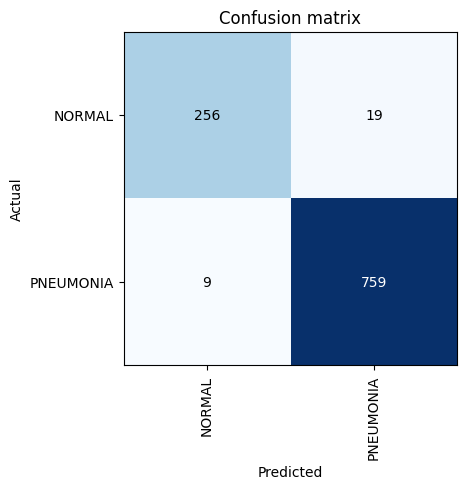

In [16]:
matritsa = ClassificationInterpretation.from_learner(learn)
matritsa.plot_confusion_matrix()

`xato` bashorat qilgan rasmlarni ko'rishimiz mumkin.

5 o'rniga rasmlar soni

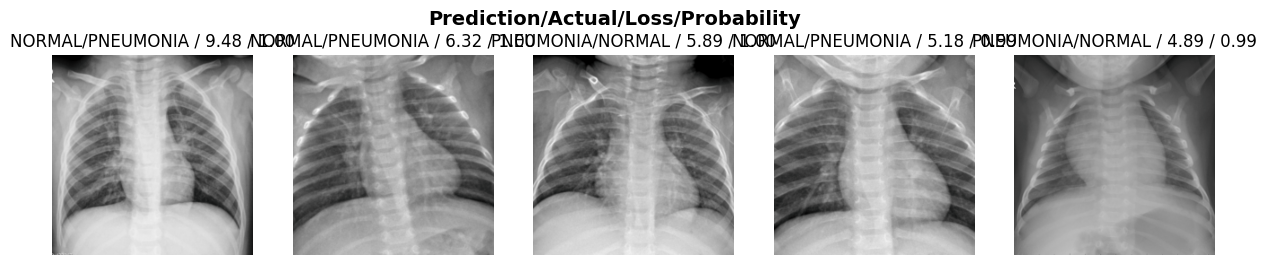

In [17]:
matritsa.plot_top_losses(5, nrows=1)

------------
Test_set
--------
Endi `train` dataseti orqali modelimizni yaratib va o'qitib olganimizdan so'ng `test` datasetimizni berishni boshlaymiz

bu yerda `sample_solution.csv` datasetidagi `labels` qismidagi har-bir rasm nomini unga mos ravishda `test` datasetimida bor bo'lgan rasmlar bilan birlashtirib modelimizga yuborib o'qitib olib, predict(natija) sini olib `natija` massiviga qo'shib olamiz.

In [18]:
natija = []
for i in range(len(df1)):
    label = df1.loc[i, 'id']
    img = PILImage.create(Path(f"/content/test/{label}"))
    pred, pred_id, probs = learn.predict(img)
    if pred == "PNEUMONIA":
      pred = 1
    else:
      pred = 0
    natija.append(pred)

Va oxirida biz predict(bashorat) qilgan `natija` massividagi o'zgaruvchilarni olib, shu indexga mos bo'lgan `sample_solution.csv` faylimizga yozib olamiz

In [19]:
solution = pd.read_csv('/content/sample_solution.csv')
solution['labels'] = natija
solution

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0
...,...,...
619,test_img_10620.jpeg,1
620,test_img_10621.jpeg,1
621,test_img_10622.jpeg,1
622,test_img_10623.jpeg,1


shu jadval haqida batafsil:

In [20]:
solution.describe()

,labels
count,624.000000
mean,0.766026
std,0.423696
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


Oxirigi qiladigan ishimiz biz `predict` qilgan jadvalni xotiraga saqlab olamiz.

In [21]:
solution.to_csv("Pnevmoniya tashxisi(2).csv", index=False)